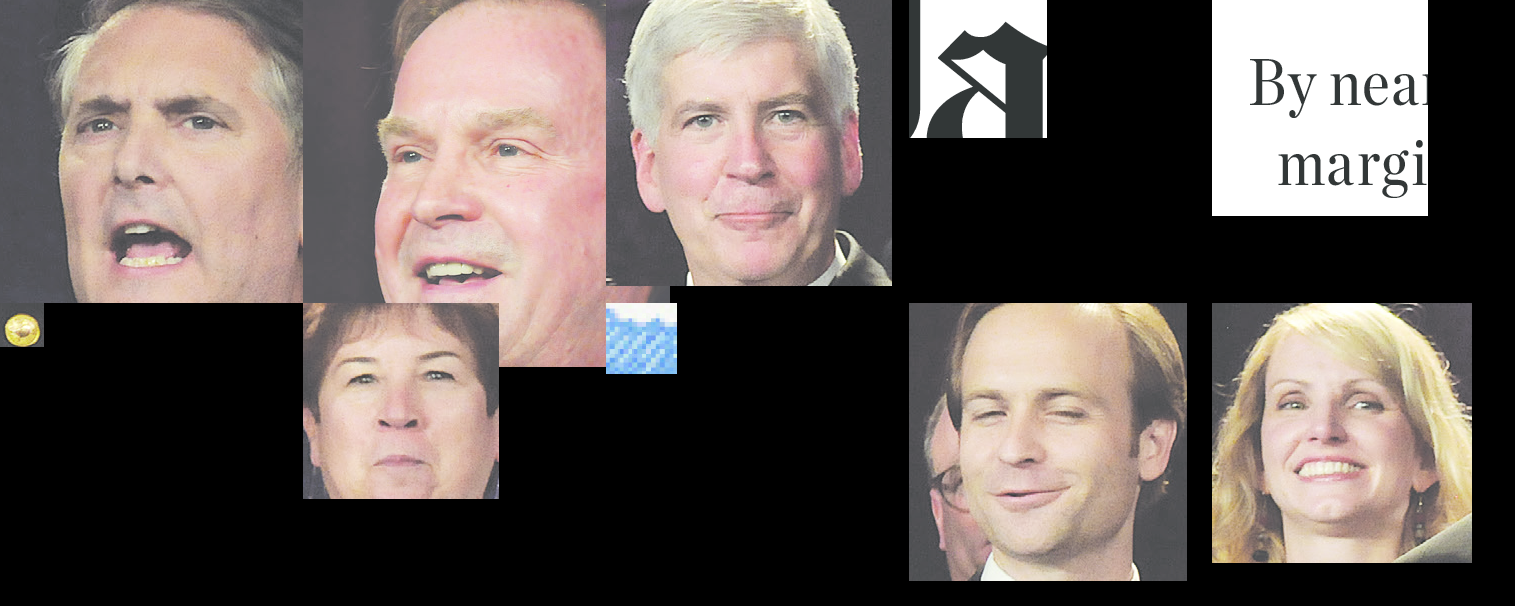

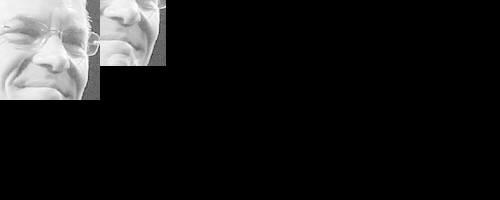

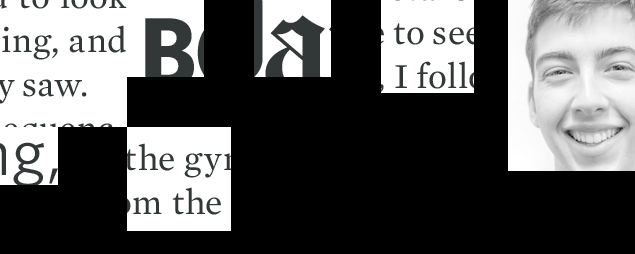

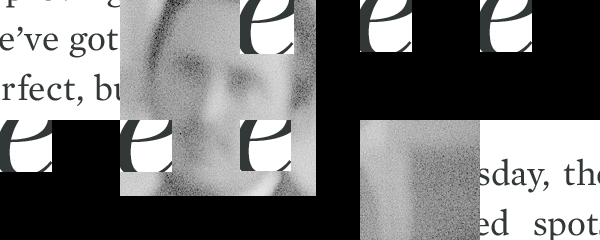

In [8]:
from zipfile import ZipFile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
def contact_sheet_creator(faces):

    if len(faces) == 0:
        return "But there were no faces in that file!"

    img_width, img_height = faces[0].width, faces[0].height
    contact_sheet = Image.new(faces[0].mode, size = (img_width*5, img_height*2))
    x = y = 0

    for img in faces:
        img = img.resize((img_width, img.height))
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )

        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+faces[0].width == contact_sheet.width:
            x=0
            y=y+faces[0].height
        else:
            x=x+faces[0].width

    """
    # converting PIL image to Opencv. Since Opencv handles numpy arrays directly we only need to convert it into
    # numpy array
    contact_sheet = np.array(contact_sheet)

    # If the image is binary (for example, scanned binary TIF), then the numpy array will be bool and so you 
    # won't be able to use it with OpenCV. In this case you need to convert it to OpenCV mask:
    # if image.dtype == bool: image = image.astype(np.uint8) * 255
    if contact_sheet.dtype == bool: 
        image = image.astype(np.uint8) * 255
    """

    return contact_sheet

img_dict = dict()
with ZipFile('readonly/small_img.zip') as zip_reader:
    #print(zip_reader.namelist())
    for mem_img in zip_reader.namelist():
        img_dict[mem_img] = {
                            'img': Image.open(zip_reader.extract(mem_img)).convert('RGB'),
                            'thresh-values': 'NA',
                            'scale': 'NA'
                            }

    img = img_dict['a-0.png']['img']
    opencv_img = cv.cvtColor(np.array(img), cv.COLOR_RGB2BGR)
    #gray = cv.cvtColor(opencv_img, cv.COLOR_BGR2GRAY)
    img_bin = cv.threshold(opencv_img, 141, 255, cv.THRESH_BINARY)[1]
    face_cord_list = face_cascade.detectMultiScale(img_bin, 1.10) 
    face_list = list()

    for x, y, w, h in face_cord_list:
        img = Image.fromarray(cv.cvtColor(opencv_img, cv.COLOR_BGR2RGB))
        face_list.append(img.crop((x, y, x+w, y+h)))

    #result = cv.cvtColor(contact_sheet_creator(face_list) , cv.COLOR_RGB2BGR)
    #cv.imshow('result', result)
    #cv.waitKey(0)
    result = contact_sheet_creator(face_list)
    display(result)


cv.destroyAllWindows()